# Objective :

"Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs."

# Step 1 :  Import Library and Dataset

In [1]:
import pandas as pd
import numpy as np

In [3]:
# Read the data in
df = pd.read_csv(r"C:\Users\Clint Dmello\Desktop\michelle\project\logistics regression\logistic_titanic.csv")

In [4]:
df.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


# Step 2 : Data Pre-Processing

### Univariate Analysis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


In [6]:
df.describe()

,PassengerId,Survived
count,418.000000,418.000000
mean,1100.500000,0.370813
std,120.810458,0.483601
min,892.000000,0.000000
25%,996.250000,0.000000
50%,1100.500000,0.000000
75%,1204.750000,1.000000
max,1309.000000,1.000000


### Checking Missing Value

In [7]:
# Do we have NA's in data
df.isna().sum()

PassengerId    0
Survived       0
dtype: int64

<AxesSubplot:>

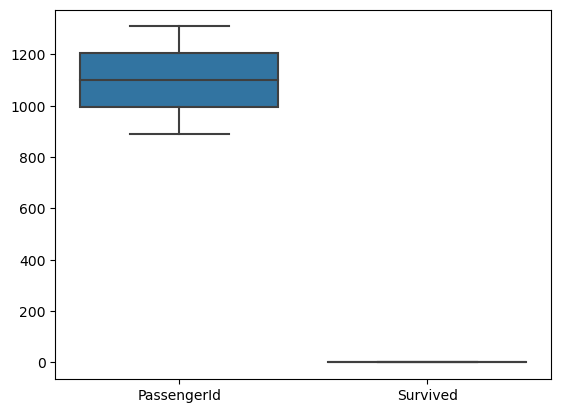

In [8]:
import seaborn as sns
sns.boxplot(data = df)

In [9]:
df.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


# Rate Analysis

In [14]:
import plotly.express as px

fig = px.pie(df,names='Survived',color='Survived',
             color_discrete_map={'Yes':'red',
                                 'No':'green'})
fig.show()

In [19]:
# creating a gender featur
df['Gender'] = df['gender'].map( {'female':0, 'male':1} ).astype(int)

KeyError: 'gender'

# Step 3: Data Partition

In [ ]:
#Dividing data into train and test dataset
from sklearn.model_selection import train_test_split
#from random import seed

#seed(20)
x = employee_combined.drop(['Churn'],axis=1)
y = employee_combined[['Churn']]

# Train test split

X_train, X_test, y_train, y_test =train_test_split(x,y,test_size=0.3,random_state=231)

# Step 4: Model Building

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
output=logreg.fit(X_train, y_train) # model

In [ ]:
output.intercept_  # beto 

In [ ]:
output.coef_  # Beta 1 -- 

In [ ]:
output.feature_names_in_

In [ ]:
train=pd.concat([X_train,y_train],axis=1)
train.head()

# Step 6 : Predictions on Train Dataset

In [ ]:
train['Probability']= output.predict_proba(X_train)[:,1]  # MODEL = dt
train.head()

In [ ]:
train['Prediction']=output.predict(X_train)  # MODEL = dt
train.head()

# Step 7 : Model Performance Metrics

In [ ]:
from sklearn.metrics import confusion_matrix  
matrix = confusion_matrix(train['Prediction'],train['Churn'])
print(matrix)

#### Final accuracy of Model Before Pruning 

In [ ]:
Accuracy_Train=((3228+738)/(4930)*100)
print(Accuracy_Train)   # overfit or High accuracy

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(train['Churn'], train['Prediction']))

In [ ]:
from sklearn.metrics import roc_auc_score,roc_curve
import matplotlib.pyplot as plt
logit_roc_auc = roc_auc_score(y_train, output.predict(X_train))
logit_roc_auc

In [ ]:
logit_roc_auc = roc_auc_score(y_train, output.predict(X_train))
fpr, tpr, thresholds= roc_curve(y_train, output.predict_proba(X_train)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)'
         % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
#plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

# Step 8 : Predictions on Test Dataset

In [ ]:
test=pd.concat([X_test,y_test],axis=1)
test.head()

In [ ]:
test['Predicted']=output.predict(X_test)
test.head()

# Step 9 : Model Performance Metrics on Test data 

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(test['Predicted'],test['Churn'])
print(confusion_matrix)

In [ ]:
Accuracy_test=((1380+308)/(2113)*100)
Accuracy_test

# Sensitivity & Specificity

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(test['Churn'], test['Predicted']))

* 49% is accuracy of bad customer capture by model 
* 89% is accuracy of Good customer capture by model 